#Question-1
Given the following specification for a single-formant resonator, obtain the transfer function of
the filter H(z) from the relation between resonance frequency / bandwidth, and the pole angle /
radius. Plot filter magnitude response (dB magnitude versus frequency) and impulse response.


>F1 (formant) = 900 Hz

>B1(bandwidth) = 200 Hz

>Fs (sampling freq) = 16 kHz

##Solution

Given,


F1(formant) = 900 Hz


B1(bandwidth) = 200 Hz


Fs(sampling freq) = 16 kHz


Second order transfer function for each formant frequency:


$H(z) = \frac{k}{(1-re^j\theta z^-1)(1-re^-j\theta z^-1)}$


$=\frac{1}{1- 2 r cos\theta z^{-1}+rz^{-2}}$


$r_i = e^{-B_i\pi T} $

$\theta _i = 2\pi F_iT$

Putting the values of F1 and B1,

$ r_1 = 0.96$


$ \theta_i = \frac{9}{80}\pi$

 Then H(z),

 $H(z) = \frac{1}{1-1.80z^{-1}+ 0.92z^{-2}}$

 Putting $z= e^{j\omega}$ for finding magnitude response,
 $ H(e^{j\omega}) = \frac{1}{1-1.80e^{-j\omega}+ 0.92e^{-j2\omega}}$

In [1]:
# Importing Libraries:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Making a different directory to download the output audio files
import os.path
from os import path

os.mkdir('/content/output_audio')

os.chdir('/content/output_audio')
!pwd
!ls

/content/output_audio


### Magnitude Response

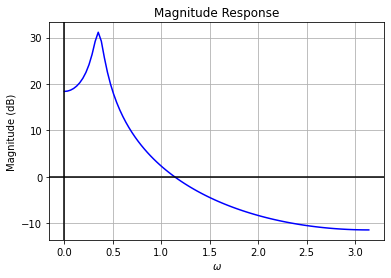

In [3]:
# defining omega
omega = np.linspace(0,math.pi,100)
j=1j
# Numerator and Denominator
num = 1
den = 1- 1.80*np.exp(-omega*j)+0.92*np.exp(-2*omega*j)
# H(z) = num/den
H_z = num/den
# mag(H(z))
mag_Hz = np.absolute(H_z)
# Magnitude in dB
mag_DB = 20 *np.log10(mag_Hz)
plt.plot(omega,mag_DB,'b')
plt.grid()
plt.xlabel('$\omega$')
plt.ylabel('Magnitude (dB)')
plt.title('Magnitude Response')
plt.axvline(color='#000000')
plt.axhline(color='#000000')
plt.show()

### Impulse Response
We know that $\frac{Y(z)}{X(z)} = H(z)$


$Y(z) = H(z) X(z)$

Putting H(z) in the above equation:

$Y(z) (1-1.80z^{-1}+0.92z^{-2}) = X(z)$

Taking z- inverse transform:

y[n] - 1.80y[n-1] + 0.92y[n-2] = x[n]

For Impulse response, $x[n] = \delta [n]$

$h[n] - 1.80h[n-1] +0.92h[n-2] = \delta [n]$

Assuming system to be causal:

$h[-1] = h[-2] = 0$

$h[0] - 0 +0 = \delta [0]$

$h[0] = 1$

similarly,

$h[1] = 1.80$ 

Other values of h[n] can be calculated using recursion:

$h[n] = 1.80h[n-1] - 0.92h[n-2] + \delta[n]$


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


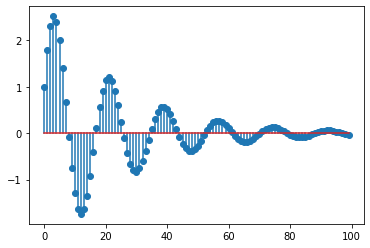

In [4]:
# Define h[n] and n
n = np.arange(100)
h = np.zeros(100)
# Define h[0] and h[1]:
h[0] = 1
h[1] = 1.80
# Define delta[n]
delta = np.zeros(100)
delta[0]=1
for i in range(2,100):
  h[i]= 1.80*h[i-1]- 0.92*h[i-2]+delta[i]

plt.stem(n,h)
plt.show()


# Question-2
Excite the above resonator (“filter”) with a periodic source excitation of F0 = 140 Hz. You can
approximate the source signal by a narrow-triangular pulse train. Compute the output of the
source-filter system over the duration of 0.5 second using the difference equation implementation
of the LTI system. Plot the time domain waveform over a few pitch periods so that you can
observe waveform characteristics. Play out the 0.5 sec duration sound and comment on the
sound quality.

## Solution

Given,

Periodic source excitation of F0 = 140 Hz.
Approximated by a narrow- triangular pulse train.

for time = 0.5 sec.

sampling frequency = Fs = 16 kHz

### Creating the source excitation
Source excitation approximated by a narrow- triangular pulse train with Fundamental Frequency F0 sampled at Sampling Frequency Fs with a triangle of width $\Delta t$.

That is $\Delta t/2$ on the left side of y axis and $\Delta t/2$ on the right side and repeating with F0.

Le us assume our source signal to be:

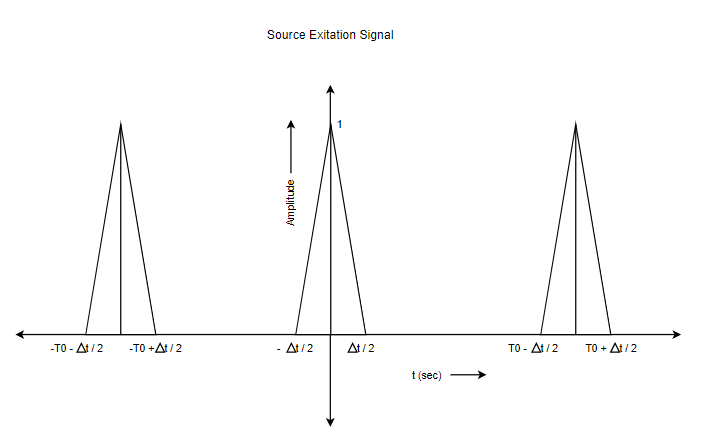

Now the above signal with frequency F0 and time period T0 is sampled at Frequency Fs and time period Ts. 

Now, we see the samples will repeat themselves after N, where N is defined as the numerator of T0/ Ts. Like in this case with F0 = 140 and Fs = 16 kHz, T0/ Ts can be written as 800/ 7. So the N for this case comes out to be 800 samples. 

In [5]:
from fractions import Fraction
# Define a function to return the samples and narrow triangular approximation 
# of impulse train
def stride(F0, Fs, delta_t):
  # F0: Fundamental frequency, Fs: Sampling Frequency, delta_t: Width of triangle
  # T0: Fundamental Time period
  T0 = 1/F0
  # Ts: Sampling Time period
  Ts = 1/Fs
  # N: Time period of triangular pulse with respect to Fs
  N = Fraction(Fs,F0).numerator
  # Strides in in (0: N)
  st = np.zeros(N)
  # Defining samples n
  n = np.arange(0,N)
  # time t = nTs
  t = Ts * n
  # k for iteration over iterations
  k=0
  for i in t:
    # cth cycle of signlal with F0
    c= i//T0
    # j time in that time period
    j = i-c*T0
    # Updating strides as triangular wave
    if( j< delta_t/2):
      st[k] =1 - 2/delta_t* j
    elif(j > (T0-delta_t/2)):
      st[k] = 1- (T0-j)*2/delta_t
    k = k+ 1
  # Returing strides and N
  return st, N
  #return st, N

### Narrow triangular pulse Source 

Now that we have a function to create our source excitation. We will select the $\Delta t$ as width of one sample from sampling frequency. We choose in this way so that we get one sample per time period T0. 

For displaying the narroe triangular pulse source we will choose $\Delta t$ as Ts that is 1/16000 in this case. For displaying the proper triangle we need to sample it with more number of sample. Here we will take 1600000 samples per seconds for showing the narrow triangular pulse source.

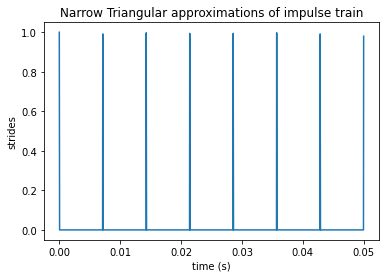

In [6]:
# Plotting triagular pulses with higher sampling rate to show the triangles:
# F0 = 140
F0 = 140
# Fs = 1600000 (high for showing the narrow triangles)
Fs = 1600000
# delta_t for one samples of original sampling freq, Fs = 16 kHz
delta_t = 1/16000
# Finding the stride and N using the above funcition:
st,N = stride(F0,Fs,delta_t)
# Defining n 
n = np.arange(0,N)
# Plotting
plot_x = n
plot_y = st
plt.plot(plot_x*1/ Fs,plot_y)
plt.xlabel('time (s)')
plt.ylabel('strides')
plt.title('Narrow Triangular approximations of impulse train')
plt.show()

As we can see from the above plot its very narrow and when we plot it for more range in time we see something like impluse. 

Now for clearly visualizing triangular nature let us change the scale of time axis and see the triangle at location t=T0.

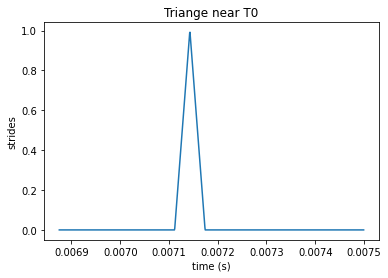

In [7]:
# Zooming in near first time period i.e 7.14 mS
plot_x = n[11000:12000]
plot_y = st[11000:12000]
plt.plot(plot_x*1/ 1600000,plot_y)
plt.xlabel('time (s)')
plt.ylabel('strides')
plt.title('Triange near T0')
plt.show()

### Sampling the Source excitation

Now that we have our source excitation ready with us we will sample with the sampling frequency Fs that is 16 kHz for this case.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


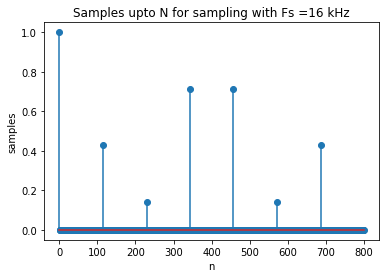

In [8]:
# Sampling the narrow triangular pulse with Fs = 16 kHz
# F0 = 140
F0 = 140
# Fs = 16000
Fs = 16000
# delta_t for one samples of original sampling freq, Fs = 16 kHz
delta_t = 1/16000
# Finding the stride and N using the above funcition:
st,N = stride(F0,Fs,delta_t)
# Defining n 
n = np.arange(0,N)
# Plotting
plot_x = n
plot_y = st
plt.stem(plot_x,plot_y)
plt.xlabel('n')
plt.ylabel('samples')
plt.title('Samples upto N for sampling with Fs =16 kHz')
plt.show()

### Creating samples x[n] for 0.5 sec
As we see in the above plot that we have one sample per time period. That is 7 sampes for N=800. N = numerator of T0/Ts.

Now we know that the above signal will repeat with a period of N that is 800 for F0=140 and Fs = 16000. We will create x[n] by using this property.

We will repeat the above signal by required number of times that is 10 in this case to get x[n].

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


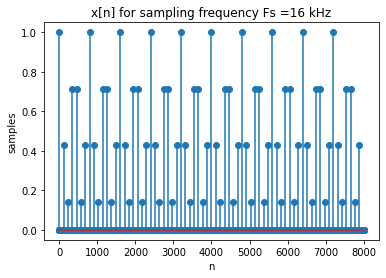

In [9]:
# Finding the samples x[n]
# for 0.5 sec, Number of samples = 0.5 *Fs
x_n = np.zeros(int(0.5*Fs))
# Updating x_n:
i=0
while(i< x_n.shape[0]):
  x_n[i:i+N] = st
  i+=N
# plot x[n]
# Defining n 
n = np.arange(0,x_n.shape[0])
# Plotting
plot_x = n
plot_y = x_n
plt.stem(plot_x,plot_y)
plt.xlabel('n')
plt.ylabel('samples')
plt.title('x[n] for sampling frequency Fs =16 kHz')
plt.show()

### Hearing x[n]

Now we will convert the source excitation in a sound wave (.wav file) to hear how it sounds.

In [10]:
# Import x[n] as wav file to hear to it
from scipy.io.wavfile import write

scaled = np.int16(x_n * 32767)
write('2_xn_F0_140.wav', 16000, scaled)

When we hear x[n] it sounded something like 'PRRRRR' in a high pitched manner. Ans nothing can be depicted from this sound.


### Calculating y[n] using difference equation
Now we have difference equation of filter from question-1 as:

y[n] = 1.80* y[n-1] -0.92* y[n-2] + x[n]

We have found out x[n] by taking the samples of narrow triangular pulse source excitation. We will now put the value of x[n] in the difference equation of filter to find out y[n].

y[0]: 

y[0] = 1.80*0 - 0.92*0 + x[0]

y[0] = x[0]

y[1]:

y[1] = 1.80*1 - 0.92*0 +x[1]


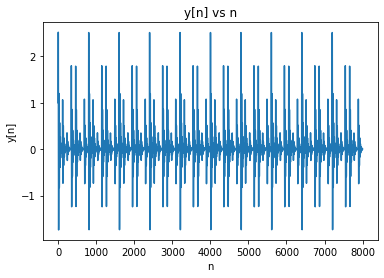

In [11]:
# Applying Filter:
#y[n]=1.80y[n−1]−0.92y[n−2]+x[n]
# y: 8000 samples in 0.5sec
y= np.zeros(8000)
y[0] = x_n[0]
y[1] = 1.80*y[0]+x_n[1]
for i in range(2,8000):
  y[i] = 1.80*y[i-1]- 0.92*y[i-2]+ x_n[i]
# Plotting y[n]
plot_x = n
plot_y = y
plt.plot(plot_x,plot_y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n] vs n')
plt.show()

### Plotting y[n] for few pitch periods
y[n] is calculated and plotted for 8000 samples (0.5 sec). Now we will change the scale of x-axis to clearly visualize y[n].



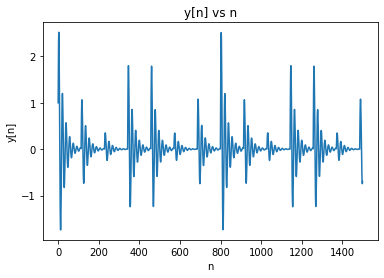

In [12]:
# Plotting only upto 1500 samples:
plot_x = n[0:1500]
plot_y = y[0:1500]
plt.plot(plot_x,plot_y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n] vs n')
plt.show()

We can observe from the above plot of y[n] that y[n] is periodic. We can see some periodic decaying kind of signal. When there is an impulse in x[n], y[n] starts decaying from that value.


### Hearing the response y[n]

Now y[n] is converted into a wav file to hear the sound.

In [13]:
# Import y[n] as wav file to hear to it
scaled = np.int16(y/y.max() * 32767)
write('2_yn_F0_140.wav', 16000, scaled)

When we hear the file 'yn_F0_140.wav':
 - First thing we depict is that it is a different from x[n]
 - It sounds like it has a lower pitch than x[n]. 
 - We are still not able to characterize it in any meaningful sound that is some vovel or consonent.
 - It is still noise with something similar to 'TROONNN' in lower in pitch than x[n]


# Question-3

Vary the parameters as indicated below; plot and comment on the differences in waveform and in
sound quality for the different parameter combinations.
>(a) F0 = 120 Hz, F1 = 300 Hz, B1 = 100 Hz

>(b) F0 = 120 Hz, F1=1200 Hz, B1 = 200 Hz

>(c) F0 = 180 Hz, F1 = 300 Hz, B1 = 100 Hz

### Solution

F0 will give different source excitation.

F1 and B1 will give different coefficients for filter.

Second order transfer function for each formant frequency:


$H(z) = \frac{k}{(1-re^j\theta z^-1)(1-re^-j\theta z^-1)}$


$=\frac{1}{1- 2 r cos\theta z^{-1}+rz^{-2}}$


$r_i = e^{-B_i\pi T} $

$\theta _i = 2\pi F_iT$


### Function for Source Excitation

We will define a function that takes Fs, F0, $\Delta t$, time for which x[n] is required, and returns x[n]

We are doing it because we need to calculate x[n] for multiple sources in question 3 and 4

In [14]:
# Defining function to Find the samples x[n]
def source(Fs, F0, delta_t, sec):
  # for x sec, Number of samples = x *Fs
  x_n = np.zeros(int(sec*Fs))
  # find out strides and N
  st,N = stride(F0,Fs,delta_t)
  # Updating x_n:
  i=0
  while(i< x_n.shape[0]):
    x_n[i:i+N] = st
    i+=N
  
  return x_n

### Function for Response

We will define a function that takes x[n], Fi, Bi and Fs as arguments and returns the response of the filter y[n].

We are doing it because we need to calculate response of multiple filters in question-3 and 4

In [15]:
# Function for second order filter response
def response(x_n, Fi, Bi, Fs):
  r_i = math.exp(-1*Bi*math.pi/Fs)
  theta_i = 2*math.pi*Fi/ Fs
  # a and b for difference equation: 
  # y[n] = ay[n-1]+by[n-2]+x[n]
  a = 2*r_i*math.cos(theta_i)
  b = -1*r_i**2
  # initiate y[n]
  y_n = np.zeros(x_n.shape[0])
  for i in range(0,y.shape[0]):
    y_n[i] = a*y_n[i-1]+ b*y_n[i-2]+ x_n[i]

  return y_n

### a. 

F0 = 120 Hz, F1 = 300 Hz, B1 = 100 Hz, Fs= 16 kHz

#### Finding Source excitation x[n]



In [16]:
# x[n] for question 3.(a)
# F0 = 120
F0 = 120
# Fs = 16000
Fs = 16000
# Finding the samples x[n]
# for 0.5 sec
x_n = np.zeros(int(0.5*Fs))
# delta_t = 1/Fs
x_n = source(Fs, F0, 1/Fs, 0.5)


#### Applying Filter and finding y[n]

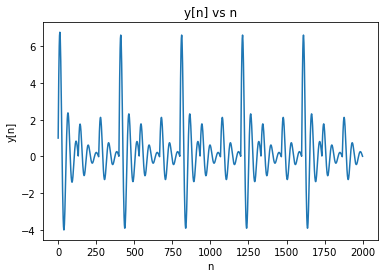

In [17]:
# Applying Filter:
F1 = 300
B1 = 100
y_n = response(x_n, F1, B1, Fs)
# Plotting y[n] for few pitches
plot_x = n[:2000]
plot_y = y_n[:2000]
plt.plot(plot_x,plot_y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n] vs n')
plt.show()

#### Hearing the response

In [18]:
# Import y[n] as wav file to hear to it
scaled = np.int16(y_n/y_n.max() * 32767)
write('3_a_yn_F0_120.wav', 16000, scaled)


### b. 

F0 = 120 Hz, F1 = 1200 Hz, B1 = 200 Hz, Fs= 16 kHz

#### Finding Source excitation x[n]



In [19]:
# x[n] for question 3.(b)
# F0 = 120
F0 = 120
# Fs = 16000
Fs = 16000
# Finding the samples x[n]
# for 0.5 sec
x_n = np.zeros(int(0.5*Fs))
# delta_t = 1/Fs
x_n = source(Fs, F0, 1/Fs, 0.5)


#### Applying Filter and finding y[n]

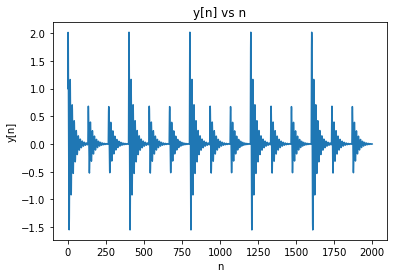

In [20]:
# Applying Filter:
F1 = 1200
B1 = 200
y_n = response(x_n, F1, B1, Fs)
# Plotting y[n] for few pitches
plot_x = n[:2000]
plot_y = y_n[:2000]
plt.plot(plot_x,plot_y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n] vs n')
plt.show()

#### Hearing the response

In [21]:
# Import y[n] as wav file to hear to it
scaled = np.int16(y_n/y_n.max() * 32767)
write('3_b_yn_F0_120.wav', 16000, scaled)


### c. 

F0 = 180 Hz, F1 = 300 Hz, B1 = 100 Hz, Fs= 16 kHz

#### Finding Source excitation x[n]



In [22]:
# x[n] for question 3.(c)
# F0 = 180
F0 = 180
# Fs = 16000
Fs = 16000
# Finding the samples x[n]
# for 0.5 sec
x_n = np.zeros(int(0.5*Fs))
# delta_t = 1/Fs
x_n = source(Fs, F0, 1/Fs, 0.5)


#### Applying Filter and finding y[n]

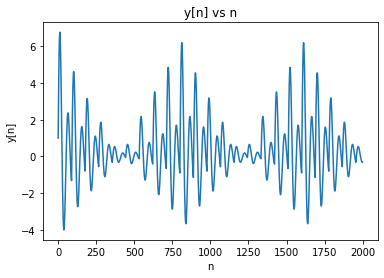

In [23]:
# Applying Filter:
F1 = 300
B1 = 100
y_n = response(x_n, F1, B1, Fs)
# Plotting y[n] for few pitches
plot_x = n[:2000]
plot_y = y_n[:2000]
plt.plot(plot_x,plot_y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n] vs n')
plt.show()

#### Hearing the response

In [24]:
# Import y[n] as wav file to hear to it
scaled = np.int16(y_n/y_n.max() * 32767)
write('3_c_yn_F0_180_3_c.wav', 16000, scaled)

###Comparison of different outputs
Let us assume the output from part a, b and c as y_a, y_b  and y_c respectively.

 - On observing the plots of y_a and y_b we see the number of peaks on both the plots in one period is same that is 3 and values of peaks are different. However, y_b looks more filled up than y_a meaning that the plot of y_b looks more dense than y_a.

 - For the plot y_c we see that signal starts from very low value and goes to a peak then comes back again and repeats the same thing. 

- Also we notice that period of y_a and y_b are same but y_c is different. This might happen because we are using same source signal for y_a and y_b and applying to different filters but in y_c we are changing the source filter itself.


On comparing the y_a, y_b and y_c after converting to a speech signal we observe:

- All the three speech signal are still sounding like some noise. We can not make any vowels or consonents from the above outputs because we are still using only one formant filters.

- Pitch of y_a is heard to be on a lower side wherever the pitch of y_b and y_c sounded little on a high side.

- When we here y_c on repeat it sounds like the ringing of telephone.

# Question-4
In place of the simple single-resonance signal, synthesize the following more realistic vowel
sounds at two distinct pitches (F0 = 120 Hz, F0 = 220 Hz). Keep the bandwidths constant at 100
Hz for all formants. Duration of sound: 0.5 sec. Comment on the sound quality across the
different sounds. Plot a few periods of any 2 examples.


>Vowel F1, F2, F3

>/a/ 730, 1090, 2440

>/i/ 270, 2290, 3010

>/u/ 300, 870, 2240

###a. 

F1 = 730, 

F2 = 1090, 

F3 = 2440, 

Fs = 16000, 

B1 = B2 = B3 = 100




#### Finding x[n] with F0 =120 Hz

In [25]:
# x[n] for question 4.(a)
# F0 = 120
F0 = 120
# Fs = 16000
Fs = 16000
# Finding the samples x[n]
# for 0.5 sec
x_n = np.zeros(int(0.5*Fs))
# delta_t = 1/Fs
x_n = source(Fs, F0, 1/Fs, 0.5)
# Defining n 
n = np.arange(0,x_n.shape[0])

#### Applying Filter
Here we have three formant frequencies with F1 = 730 Hz, F2 = 1090, F3 = 2440 also Bi for all three formants is takes as 100 Hz.

We can model vocal tract for vowels as cascaded two order filters.

To compute the response of cascaded filters we will first find the response of first filter with F1 = 730 Hz (y1[n]). Then use y1[n] as input to the second cascaded filter and find out y2[n]. After y2[n] is found we will now apply y[2] to the third filter and get our final output.


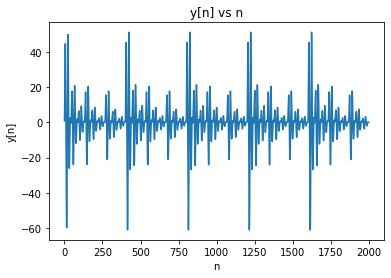

In [26]:
# Applying Filter:
# First formant:
F1 = 730
Bi = 100  # Same Bi for all sections
y1 = response(x_n,F1,Bi,Fs)

# Second Formant:
F2 = 1090
Bi = 100 
y2 = response(y1,F2,Bi,Fs)

# Third formant
F3 = 2440
Bi = 100  
y = response(y2,F3,Bi,Fs)

# Plotting y[n] for few pitches
plot_x = n[:2000]
plot_y = y[:2000]
plt.plot(plot_x,plot_y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n] vs n')
plt.show()

#### Hearing the response

In [27]:
# Import y[n] as wav file to hear to it
scaled = np.int16(y/np.abs(y).max() * 32767)
write('4_a_yn_F0_120.wav', 16000, scaled)

When we hear the above sound we can clearly identify it as अ from the hindi vowel set. However, it was not natural like humans speak but it was indentifiable to a vowel.

We still find this vowel to be noisy. This might be because we are not using ideal impulse but a narrow triangular pulse as an impulse.

#### Finding x[n] with F0 =220 Hz

In [28]:
# x[n] for question 4.(a)
# F0 = 220
F0 = 220
# Fs = 16000
Fs = 16000
# Finding the samples x[n]
# for 0.5 sec
x_n = np.zeros(int(0.5*Fs))
# delta_t = 1/Fs
x_n = source(Fs, F0, 1/Fs, 0.5)
# Defining n 
n = np.arange(0,x_n.shape[0])

#### Applying Filter
Here we have three formant frequencies with F1 = 730 Hz, F2 = 1090, F3 = 2440 also Bi for all three formants is takes as 100 Hz.

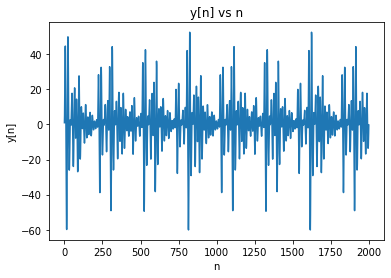

In [29]:
# Applying Filter:
# First formant:
F1 = 730
Bi = 100  # Same Bi for all sections
y1 = response(x_n,F1,Bi,Fs)

# Second Formant:
F2 = 1090
Bi = 100 
y2 = response(y1,F2,Bi,Fs)

# Third formant
F3 = 2440
Bi = 100  
y = response(y2,F3,Bi,Fs)

# Plotting y[n] for few pitches
plot_x = n[:2000]
plot_y = y[:2000]
plt.plot(plot_x,plot_y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n] vs n')
plt.show()

#### Hearing the response

In [30]:
# Import y[n] as wav file to hear to it
scaled = np.int16(y/np.abs(y).max() * 32767)
write('4_a_yn_F0_220.wav', 16000, scaled)

In this section only the fundamental frequency of source excitation is increased and that can be clearly observed in the output speech signal. It is still depicted as अ phone of hindi phonemetic system but in a higher pitch of output of 120 Hz signal.

###b. 

F1 = 270, 

F2 = 2290, 

F3 = 3010, 

Fs = 16000, 

B1 = B2 = B3 = 100




#### Finding x[n] with F0 =120 Hz

In [31]:
# x[n] for question 4.(b)
# F0 = 120
F0 = 120
# Fs = 16000
Fs = 16000
# Finding the samples x[n]
# for 0.5 sec
x_n = np.zeros(int(0.5*Fs))
# delta_t = 1/Fs
x_n = source(Fs, F0, 1/Fs, 0.5)
# Defining n 
n = np.arange(0,x_n.shape[0])

#### Applying Filter
Here we have three formant frequencies with F1 = 270 Hz, F2 = 2290, F3 = 3010 also Bi for all three formants is takes as 100 Hz.


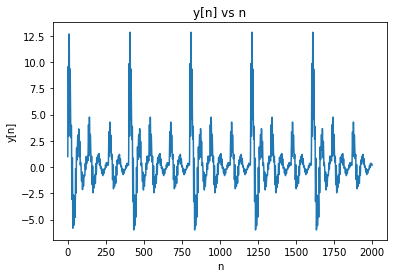

In [32]:
# Applying Filter:
# First formant:
F1 = 270
Bi = 100  # Same Bi for all sections
y1 = response(x_n,F1,Bi,Fs)

# Second Formant:
F2 = 2290
Bi = 100 
y2 = response(y1,F2,Bi,Fs)

# Third formant
F3 = 3010
Bi = 100  
y = response(y2,F3,Bi,Fs)

# Plotting y[n] for few pitches
plot_x = n[:2000]
plot_y = y[:2000]
plt.plot(plot_x,plot_y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n] vs n')
plt.show()

#### Hearing the response

In [33]:
# Import y[n] as wav file to hear to it
scaled = np.int16(y/np.abs(y).max() * 32767)
write('4_b_yn_F0_120.wav', 16000, scaled)

When we hear the above sound we can clearly identify it as इ from the hindi vowel set. However, it was not natural as the part a of the question.

And the signal is still found to be noisy because source excitation is not changed from narrow triangular pulse.

#### Finding x[n] with F0 =220 Hz

In [34]:
# x[n] for question 4.(b)
# F0 = 220
F0 = 220
# Fs = 16000
Fs = 16000
# Finding the samples x[n]
# for 0.5 sec
x_n = np.zeros(int(0.5*Fs))
# delta_t = 1/Fs
x_n = source(Fs, F0, 1/Fs, 0.5)
# Defining n 
n = np.arange(0,x_n.shape[0])

#### Applying Filter
Here we have three formant frequencies with F1 = 270 Hz, F2 = 2290, F3 = 3010 also Bi for all three formants is takes as 100 Hz.

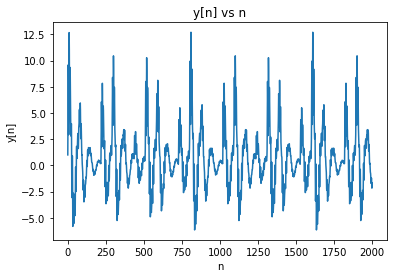

In [35]:
# Applying Filter:
# First formant:
F1 = 270
Bi = 100  # Same Bi for all sections
y1 = response(x_n,F1,Bi,Fs)

# Second Formant:
F2 = 2290
Bi = 100 
y2 = response(y1,F2,Bi,Fs)

# Third formant
F3 = 3010
Bi = 100  
y = response(y2,F3,Bi,Fs)

# Plotting y[n] for few pitches
plot_x = n[:2000]
plot_y = y[:2000]
plt.plot(plot_x,plot_y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n] vs n')
plt.show()

#### Hearing the response

In [36]:
# Import y[n] as wav file to hear to it
scaled = np.int16(y/np.abs(y).max() * 32767)
write('4_b_yn_F0_220.wav', 16000, scaled)

In this section only the fundamental frequency of source excitation is increased and that can be clearly observed in the output speech signal. It is still depicted as इ phone of hindi phonemetic system but in a higher pitch of output of 120 Hz signal.

###c. 

F1 = 300, 

F2 = 870, 

F3 = 2240, 

Fs = 16000, 

B1 = B2 = B3 = 100




#### Finding x[n] with F0 =120 Hz

In [37]:
# x[n] for question 4.(c)
# F0 = 120
F0 = 120
# Fs = 16000
Fs = 16000
# Finding the samples x[n]
# for 0.5 sec
x_n = np.zeros(int(0.5*Fs))
# delta_t = 1/Fs
x_n = source(Fs, F0, 1/Fs, 0.5)
# Defining n 
n = np.arange(0,x_n.shape[0])

#### Applying Filter
Here we have three formant frequencies with F1 = 300 Hz, F2 = 870, F3 = 2240 also Bi for all three formants is takes as 100 Hz.


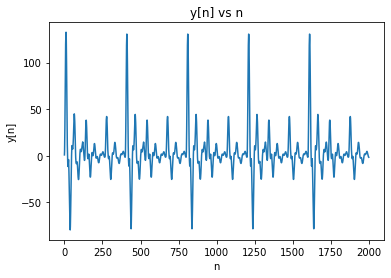

In [38]:
# Applying Filter:
# First formant:
F1 = 300
Bi = 100  # Same Bi for all sections
y1 = response(x_n,F1,Bi,Fs)

# Second Formant:
F2 = 870
Bi = 100 
y2 = response(y1,F2,Bi,Fs)

# Third formant
F3 = 2240
Bi = 100  
y = response(y2,F3,Bi,Fs)

# Plotting y[n] for few pitches
plot_x = n[:2000]
plot_y = y[:2000]
plt.plot(plot_x,plot_y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n] vs n')
plt.show()

#### Hearing the response

In [39]:
# Import y[n] as wav file to hear to it
scaled = np.int16(y/np.abs(y).max() * 32767)
write('4_c_yn_F0_120.wav', 16000, scaled)

When we hear the above sound we can clearly identify it as उ from the hindi vowel set. However, it was not natural as the part a and b of the question.

And the signal is still found to be noisy because source excitation is not changed from narrow triangular pulse.

#### Finding x[n] with F0 =220 Hz

In [40]:
# x[n] for question 4.(c)
# F0 = 220
F0 = 220
# Fs = 16000
Fs = 16000
# Finding the samples x[n]
# for 0.5 sec
x_n = np.zeros(int(0.5*Fs))
# delta_t = 1/Fs
x_n = source(Fs, F0, 1/Fs, 0.5)
# Defining n 
n = np.arange(0,x_n.shape[0])

#### Applying Filter
Here we have three formant frequencies with F1 = 300 Hz, F2 = 870, F3 = 2240 also Bi for all three formants is takes as 100 Hz.

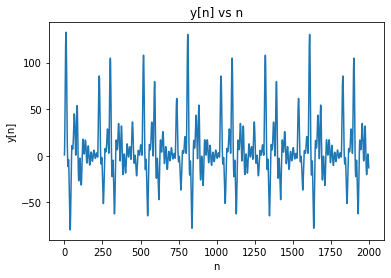

In [41]:
# Applying Filter:
# First formant:
F1 = 300
Bi = 100  # Same Bi for all sections
y1 = response(x_n,F1,Bi,Fs)

# Second Formant:
F2 = 870
Bi = 100 
y2 = response(y1,F2,Bi,Fs)

# Third formant
F3 = 2240
Bi = 100  
y = response(y2,F3,Bi,Fs)

# Plotting y[n] for few pitches
plot_x = n[:2000]
plot_y = y[:2000]
plt.plot(plot_x,plot_y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n] vs n')
plt.show()

#### Hearing the response

In [42]:
# Import y[n] as wav file to hear to it
scaled = np.int16(y/np.abs(y).max() * 32767)
write('4_c_yn_F0_220.wav', 16000, scaled)

In this section only the fundamental frequency of source excitation is increased and that can be clearly observed in the output speech signal. It is still depicted as उ phone of hindi phonemetic system but in a higher pitch of output of 120 Hz signal.

Output signal from 220 Hz is still not distinguishable as a voice of female. We may try to increase the pitch of output signal to observe the female voice in next section.

#### Finding x[n] with F0 =320 Hz

In [43]:
# x[n] for question 4.(c)
# F0 = 320
F0 = 320
# Fs = 16000
Fs = 16000
# Finding the samples x[n]
# for 0.5 sec
x_n = np.zeros(int(0.5*Fs))
# delta_t = 1/Fs
x_n = source(Fs, F0, 1/Fs, 0.5)
# Defining n 
n = np.arange(0,x_n.shape[0])

#### Applying Filter
Here we have three formant frequencies with F1 = 300 Hz, F2 = 870, F3 = 2240 also Bi for all three formants is takes as 100 Hz.

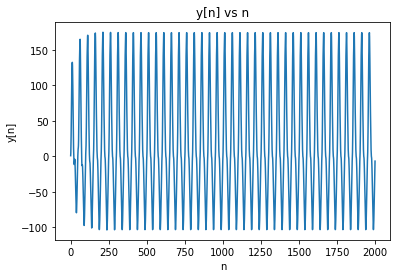

In [44]:
# Applying Filter:
# First formant:
F1 = 300
Bi = 100  # Same Bi for all sections
y1 = response(x_n,F1,Bi,Fs)

# Second Formant:
F2 = 870
Bi = 100 
y2 = response(y1,F2,Bi,Fs)

# Third formant
F3 = 2240
Bi = 100  
y = response(y2,F3,Bi,Fs)

# Plotting y[n] for few pitches
plot_x = n[:2000]
plot_y = y[:2000]
plt.plot(plot_x,plot_y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n] vs n')
plt.show()

#### Hearing the response

In [45]:
# Import y[n] as wav file to hear to it
scaled = np.int16(y/np.abs(y).max() * 32767)
write('4_c_yn_F0_320.wav', 16000, scaled)

Here we observe the hindi vowel उ in a female voice meaning in a high pitch.

Here one more thing can be observed that the noise that was appearing in above speech outputs is absent. Because we are using F0 = 320 Hz, and our Fs = 16000 is an integer multiple of F0 here so the sampled signal x[n] will have ideal impulsed with value of one at all the samples. This was not the case in the above examples.

We will now try listening to the sounds after approximating the source excitation as a narrow rectangular pulse. That is we will get samples x[n] with amplitude of 1.

### Using narrow square Pulses as input

We will now use narrow square pulses as input for the parb b of question 4 and see what differences are there.

#### Finding rectangular narrow pulse x[n] with F0 =120 Hz

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


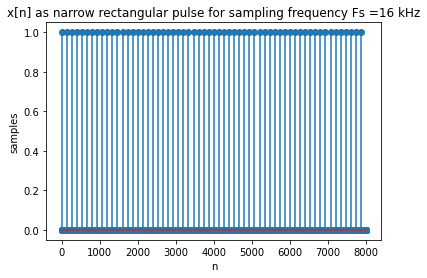

In [46]:
# x[n] 
# F0 = 120
F0 = 120
# Fs = 16000
Fs = 16000
# Finding the samples x[n]
# for 0.5 sec
x_n = np.zeros(int(0.5*Fs))
# delta_t = 1/Fs
x_n = source(Fs, F0, 1/Fs, 0.5)
# Making all impulses amplitude as 1 because that is what we will get after 
# sampling narrow rectangular pulse
x_n = np.where(x_n>0,1,0)
# Defining n 
n = np.arange(0,x_n.shape[0])

# Plotting x[n]:
plot_x = n
plot_y = x_n
plt.stem(plot_x,plot_y)
plt.xlabel('n')
plt.ylabel('samples')
plt.title('x[n] as narrow rectangular pulse for sampling frequency Fs =16 kHz')
plt.show()

#### Applying Filter
Here we have three formant frequencies with F1 = 270 Hz, F2 = 2290, F3 = 3010 also Bi for all three formants is takes as 100 Hz.


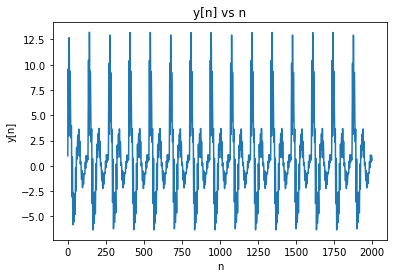

In [47]:
# Applying Filter:
# First formant:
F1 = 270
Bi = 100  # Same Bi for all sections
y1 = response(x_n,F1,Bi,Fs)

# Second Formant:
F2 = 2290
Bi = 100 
y2 = response(y1,F2,Bi,Fs)

# Third formant
F3 = 3010
Bi = 100  
y = response(y2,F3,Bi,Fs)

# Plotting y[n] for few pitches
plot_x = n[:2000]
plot_y = y[:2000]
plt.plot(plot_x,plot_y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n] vs n')
plt.show()

#### Hearing the response

In [48]:
# Import y[n] as wav file to hear to it
scaled = np.int16(y/np.abs(y).max() * 32767)
write('4_b_yn_F0_120_rect.wav', 16000, scaled)

As expected here we do not get to listen the noise that was coming when we were approximating the source signal using a narrow traingular wave.

When we were hearing the outputs after approximating the source excitaion by a narrow triangular pulse then we heard the output as someone was speeking in front of a fan. The thing we used to do as a kid 😅😅.

We will now increase the pitch to hear a very high pitched sound.


#### Finding rectangular narrow pulse x[n] with F0 =720 Hz

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


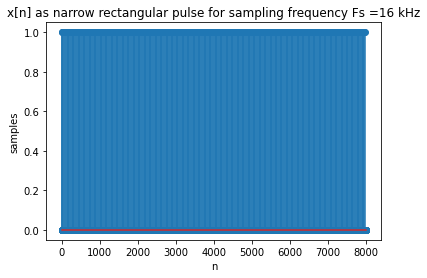

In [49]:
# x[n] 
# F0 = 720
F0 = 720
# Fs = 16000
Fs = 16000
# Finding the samples x[n]
# for 0.5 sec
x_n = np.zeros(int(0.5*Fs))
# delta_t = 1/Fs
x_n = source(Fs, F0, 1/Fs, 0.5)
# Making all impulses amplitude as 1 because that is what we will get after 
# sampling narrow rectangular pulse
x_n = np.where(x_n>0,1,0)
# Defining n 
n = np.arange(0,x_n.shape[0])

# Plotting x[n]:
plot_x = n
plot_y = x_n
plt.stem(plot_x,plot_y)
plt.xlabel('n')
plt.ylabel('samples')
plt.title('x[n] as narrow rectangular pulse for sampling frequency Fs =16 kHz')
plt.show()

#### Applying Filter
Here we have three formant frequencies with F1 = 270 Hz, F2 = 2290, F3 = 3010 also Bi for all three formants is takes as 100 Hz.


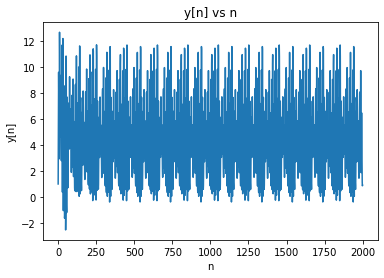

In [50]:
# Applying Filter:
# First formant:
F1 = 270
Bi = 100  # Same Bi for all sections
y1 = response(x_n,F1,Bi,Fs)

# Second Formant:
F2 = 2290
Bi = 100 
y2 = response(y1,F2,Bi,Fs)

# Third formant
F3 = 3010
Bi = 100  
y = response(y2,F3,Bi,Fs)

# Plotting y[n] for few pitches
plot_x = n[:2000]
plot_y = y[:2000]
plt.plot(plot_x,plot_y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n] vs n')
plt.show()

#### Hearing the response

In [51]:
# Import y[n] as wav file to hear to it
scaled = np.int16(y/np.abs(y).max() * 32767)
write('4_b_yn_F0_720_rect.wav', 16000, scaled)

Now it is not at all like natural इ. It is like some noise in high pitch but still can be taken as sound इ.

#Download all outputs in a zip folder

In [ ]:
# Download All Optputs:
# Remove '#*Remove This* from below line to download the outputs
#*Remove This*  from google.colab import files
!zip -r outputs.zip /content/output_audio/ 
files.download("/content/output_audio/outputs.zip")